In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [152]:
# load the preprocess data 
df = pd.read_csv("lung cancer data.csv")
df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Model Building & Training

**i already done the preprocesing so next i am going to train test split data**

# Encode Categorical Variables


In [155]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['GENDER', 'LUNG_CANCER']

In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df[col]

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

# # Scale the Numerical Features
**Scaling ensures features are on the same level (important for algorithms like SVM or Logistic Regression).**

In [109]:
from sklearn.preprocessing import StandardScaler

X = df.drop('LUNG_CANCER', axis=1)  # thats Features
y = df['LUNG_CANCER']               # thats  Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.95257934,  0.77185028, -1.13529242, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.95257934, -0.57010322,  0.88083033, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.95257934,  0.52785873,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -0.08212013, -1.13529242, ..., -1.33558369,
         1.06350105, -1.12047956]])

# Train-Test Split

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


array([[-1.04978132, -0.2041159 ,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132,  0.16187141,  0.88083033, ..., -1.33558369,
         1.06350105,  0.892475  ],
       [-1.04978132,  1.25983337,  0.88083033, ..., -1.33558369,
        -0.94029056, -1.12047956],
       ...,
       [ 0.95257934, -0.81409477,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -1.42407363, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-1.04978132, -0.44810745,  0.88083033, ...,  0.74873631,
        -0.94029056, -1.12047956]])

In [116]:
y_train

26     1
47     1
198    1
90     1
303    1
      ..
171    0
32     0
77     1
146    1
280    0
Name: LUNG_CANCER, Length: 247, dtype: int32

# Logistic Regression (Baseline Model)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [121]:
# predicting the model
y_pred_log = log_model.predict(X_test)
y_pred_log

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [126]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [130]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Support Vector Machine (SVM)

In [134]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)



SVC(probability=True)

In [136]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Cross-Validation 

In [139]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"Random Forest CV Accuracy: {cv_scores.mean():.2f}")


Random Forest CV Accuracy: 0.92


# Save Predictions for Evaluation

In [141]:
model_preds = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

In [142]:
model_preds

{'Logistic Regression': array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'Decision Tree': array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'Random Forest': array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'SVM': array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])}

# Model Evaluation

**Evaluation Metrics (for each model)**

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Evaluation

In [173]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9032258064516129
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444


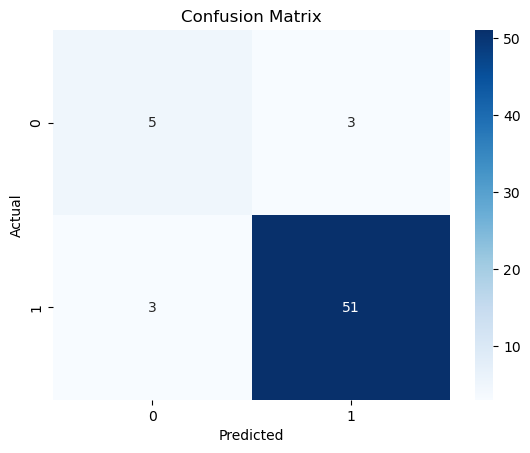

In [181]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

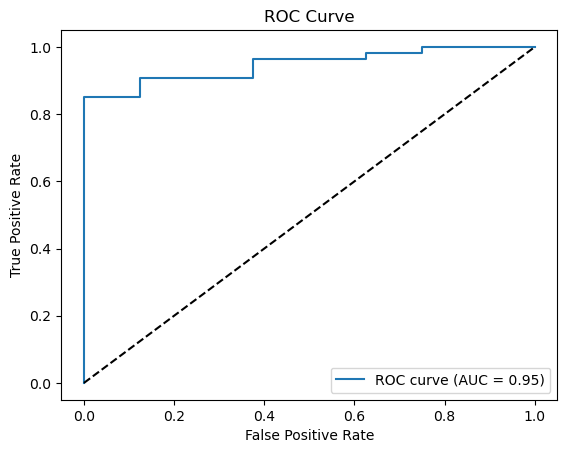

In [183]:
# ROC-AUC
y_proba = log_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [185]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Store evaluation results
results = {}


In [189]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "ROC Curve": roc_curve(y_test, y_proba) if y_proba is not None else None
    }

results


{'Logistic Regression': {'Accuracy': 0.9032258064516129,
  'Precision': 0.9444444444444444,
  'Recall': 0.9444444444444444,
  'F1 Score': 0.9444444444444444,
  'AUC': 0.9467592592592593,
  'Confusion Matrix': array([[ 5,  3],
         [ 3, 51]], dtype=int64),
  'ROC Curve': (array([0.   , 0.   , 0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375,
          0.625, 0.625, 0.75 , 0.75 , 1.   ]),
   array([0.        , 0.01851852, 0.2037037 , 0.24074074, 0.85185185,
          0.85185185, 0.90740741, 0.90740741, 0.96296296, 0.96296296,
          0.98148148, 0.98148148, 1.        , 1.        ]),
   array([       inf, 0.99985241, 0.99584956, 0.99579478, 0.87827053,
          0.85369162, 0.72438854, 0.69653295, 0.49783501, 0.41934244,
          0.25042696, 0.24919317, 0.10879649, 0.0271325 ]))},
 'Decision Tree': {'Accuracy': 0.8870967741935484,
  'Precision': 0.9795918367346939,
  'Recall': 0.8888888888888888,
  'F1 Score': 0.9320388349514563,
  'AUC': 0.8819444444444444,
  'Confusion Matrix': ar

# save the file of final model

In [194]:
import joblib

# Save model
joblib.dump(results, "lung_cancer_model.pkl")


['lung_cancer_model.pkl']